In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from matplotlib import pyplot as plt

In [2]:
from sklearn.datasets import load_diabetes

diabetes_datasets = load_diabetes()
#print(diabetes_datasets)

data = diabetes_datasets['data']
target = diabetes_datasets['target']

#print(data.shape)
#print(target.shape)
target = (target - target.mean(axis = 0)) / target.std()

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(397, 10)
(45, 10)
(397,)
(45,)


In [3]:
def evaluate(model, x_test, y_test):
    test_loss, test_acc = model.evaluate(x = x_test, y = y_test, verbose = 0)
    print('accuracy = {acc:0.2f}%, loss = {loss: 0.2f}'.format(acc = test_acc * 100, loss = test_loss))
    
def get_new_model():
    model = Sequential([
        Dense(128, activation = 'relu', input_shape = (x_train.shape[1],)),
        Dense(128, activation = 'relu'),
        Dense(128, activation = 'relu'),
        Dense(128, activation = 'relu'),
        Dense(128, activation = 'relu'),
        Dense(1)
    ])
    
    model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])
    return model

In [4]:
model = get_new_model()

history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, verbose = 1)

Epoch 1/100
13/13 [==============================] - 0s 19ms/step - loss: 0.9504 - mae: 0.8362 - val_loss: 0.8248 - val_mae: 0.7449
Epoch 2/100
13/13 [==============================] - 0s 7ms/step - loss: 0.6693 - mae: 0.6842 - val_loss: 0.7461 - val_mae: 0.6869
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 0.5220 - mae: 0.5851 - val_loss: 0.6914 - val_mae: 0.6596
Epoch 4/100
13/13 [==============================] - 0s 6ms/step - loss: 0.4829 - mae: 0.5708 - val_loss: 0.6652 - val_mae: 0.6429
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.4529 - mae: 0.5360 - val_loss: 0.7725 - val_mae: 0.6962
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 0.4414 - mae: 0.5379 - val_loss: 0.6652 - val_mae: 0.6357
Epoch 7/100
13/13 [==============================] - 0s 6ms/step - loss: 0.4381 - mae: 0.5312 - val_loss: 0.6382 - val_mae: 0.6077
Epoch 8/100
13/13 [==============================] - 0s 7ms/step - loss: 0.4333 - 

13/13 [==============================] - 0s 6ms/step - loss: 0.0925 - mae: 0.2408 - val_loss: 0.8822 - val_mae: 0.6848
Epoch 64/100
13/13 [==============================] - 0s 6ms/step - loss: 0.1154 - mae: 0.2662 - val_loss: 0.9626 - val_mae: 0.7167
Epoch 65/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0812 - mae: 0.2166 - val_loss: 0.8670 - val_mae: 0.6739
Epoch 66/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0606 - mae: 0.1838 - val_loss: 0.8803 - val_mae: 0.6621
Epoch 67/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0560 - mae: 0.1733 - val_loss: 0.7823 - val_mae: 0.6089
Epoch 68/100
13/13 [==============================] - 0s 7ms/step - loss: 0.0659 - mae: 0.1962 - val_loss: 0.9338 - val_mae: 0.6903
Epoch 69/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0612 - mae: 0.1836 - val_loss: 1.0116 - val_mae: 0.7261
Epoch 70/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0611 - mae: 0

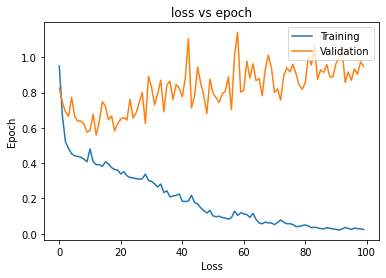

In [5]:
%matplotlib inline

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss vs epoch')
plt.xlabel('Loss')
plt.ylabel('Epoch')
plt.legend(['Training', 'Validation'], loc = 'upper right')
plt.show()

In [6]:
from tensorflow.keras.callbacks import EarlyStopping

es_callback = EarlyStopping(patience = 3, monitor = 'val_loss')

In [7]:
model = get_new_model()

history = model.fit(x_train, 
                    y_train, 
                    validation_data = (x_test, y_test), 
                    epochs = 100, verbose = 1, callbacks = [es_callback])

Epoch 1/100
13/13 [==============================] - 0s 20ms/step - loss: 0.9488 - mae: 0.8392 - val_loss: 0.8421 - val_mae: 0.7522
Epoch 2/100
13/13 [==============================] - 0s 7ms/step - loss: 0.6144 - mae: 0.6609 - val_loss: 0.7635 - val_mae: 0.6813
Epoch 3/100
13/13 [==============================] - 0s 7ms/step - loss: 0.5276 - mae: 0.5699 - val_loss: 0.6598 - val_mae: 0.6586
Epoch 4/100
13/13 [==============================] - 0s 7ms/step - loss: 0.4793 - mae: 0.5664 - val_loss: 0.7267 - val_mae: 0.6946
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.4576 - mae: 0.5446 - val_loss: 0.6355 - val_mae: 0.6302
Epoch 6/100
13/13 [==============================] - 0s 7ms/step - loss: 0.4423 - mae: 0.5375 - val_loss: 0.5808 - val_mae: 0.5766
Epoch 7/100
13/13 [==============================] - 0s 8ms/step - loss: 0.4587 - mae: 0.5412 - val_loss: 0.5829 - val_mae: 0.5771
Epoch 8/100
13/13 [==============================] - 0s 8ms/step - loss: 0.4409 - 